<a href="https://colab.research.google.com/github/mayankawrr/EDA-Probability-Distributions/blob/main/Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

An authentic coin is known to have P(H) = 0.5 when tossed, while a
counterfeit coin has P(H) = 0.6. Suppose you have a coin that could be
authentic or counterfeit. You may toss the coin multiple times and observe
the results. How will you test whether the coin is authentic or counterfeit?

We have 2 ways to approach this:

* Sample Proportion technique (favourable/unfavourable)=P, but this will only give the answer (value of P(H)), not the strength of evidence

* Hypothesis Testing- Standard statistical procedure, which allows us to know the strength of evidence, critical values, manipulate confidence intervals and observe how all these things change as the properties of experiment change including sample size, threshold value, etc

# Hypothesis Testing

We want to decide between a null hypothesis $H_0$ and an alternative hypothesis $H_A$ based on sample data.

**Example (Counterfeit Coin):**

- Null Hypothesis:  
  $$ H_0: P(H) = 0.5 $$
  
- Alternative Hypothesis:  
  $$ H_A: P(H) = 0.6 $$
  
Where $P(H)$ denotes the probability of obtaining heads when flipping the coin

In hypothesis testing, the null hypothesis is by default the hypothesis that there is no effect or no difference—it serves as the starting assumption. ***The fundamental goal of hypothesis testing is to collect evidence from data to see if this null hypothesis can be rejected. So yes, by default, we want to find evidence strong enough to prove the null hypothesis wrong.***




- Acceptance Set:  
  $$ A = \{ \text{all outcomes for which we accept } H_0 \} $$

How to decide good acceptance set for a test?

### Size and Power of a Test

**Metric 1: Significance level (also called size) of a test, denoted** $\alpha$

- **Type I error (False +ve)**: Reject $H_0$ when $H_0$ is true  
- $\alpha = P(\text{Type I error}) = P(\text{Reject } H_0 \mid H_0 \text{ is true})$

**Metric 2: Power of a test,** $1 - \beta$

- **Type II error (False -ve)**: Accept $H_0$ when $H_A$ is true  
- $\beta = P(\text{Type II error}) = P(\text{Accept } H_0 \mid H_A \text{ is true})$




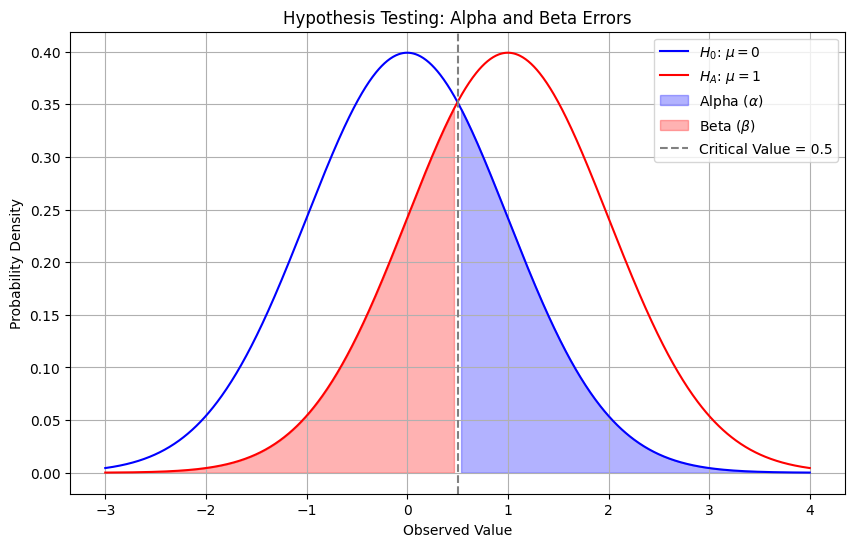

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the distributions
mu0 = 0  # Mean under the null hypothesis
sigma0 = 1 # Standard deviation under the null hypothesis
muA = 1  # Mean under the alternative hypothesis (assuming a difference)
sigmaA = 1 # Standard deviation under the alternative hypothesis

# Generate x values
x = np.linspace(-3, 4, 1000)

# Generate the probability density functions (PDFs)
pdf0 = norm.pdf(x, mu0, sigma0)
pdfA = norm.pdf(x, muA, sigmaA)

# Plot the distributions
plt.figure(figsize=(10, 6))
plt.plot(x, pdf0, label=r'$H_0$: $\mu = 0$', color='blue')
plt.plot(x, pdfA, label=r'$H_A$: $\mu = 1$', color='red')

# Choose a random critical value (for demonstration)
critical_value = 0.5

# Shade the alpha region (Type I error)
# This is the area under H0 to the right of the critical value
x_alpha = np.linspace(critical_value, 4, 100)
plt.fill_between(x_alpha, norm.pdf(x_alpha, mu0, sigma0), color='blue', alpha=0.3, where=(x_alpha > critical_value), interpolate=True, label=r'Alpha ($\alpha$)')

# Shade the beta region (Type II error)
# This is the area under HA to the left of the critical value
x_beta = np.linspace(-3, critical_value, 100)
plt.fill_between(x_beta, norm.pdf(x_beta, muA, sigmaA), color='red', alpha=0.3, where=(x_beta < critical_value), interpolate=True, label=r'Beta ($\beta$)')


# Add labels and title
plt.xlabel('Observed Value')
plt.ylabel('Probability Density')
plt.title('Hypothesis Testing: Alpha and Beta Errors')
plt.axvline(critical_value, color='gray', linestyle='--', label=f'Critical Value = {critical_value}')
plt.legend()
plt.grid(True)
plt.show()

These errors alpha and beta are rejection regions for Null and Alternate hypothesis (Rejection=Error)

Different alternate hypothesis give different beta since alternate hypothesis an be arbitrarily multiple, it is equivalent of translating the H(A) graph right or left, which keeping critical value and H(0) graph fixed

Pretty evudent that:
* more alpha = more error = smaller critical value
* more beta = more error = smaller alternative hypothesis

If we tolerate more mistakes (errors), we  detect a smaller true effect (as graphs are close to each other)

### How This Leads to More Chances of Discovery

* When $\alpha$ is higher, the threshold for claiming a discovery (rejecting $H_0$) is lower.

* This increases the test's **sensitivity** or **power** to detect smaller or subtler true effects (real differences).

* In other words, by allowing a greater chance of false alarms (Type I errors), you increase the likelihood of detecting a genuine effect if it exists.

* This is a fundamental trade-off:  
$$
\text{Higher } \alpha \quad \longrightarrow \quad \text{More false positives but higher power}
$$

* Especially when sample sizes are fixed, accepting more false positives increases the chance of discovering true effects.

Alpha and Beta also have a tradeoff, we generally fix alpha, then we get critical value, then we minimize beta for that test
